In [1]:
import numpy as np
import pandas as pd

import prepare_skyler as p
import explore_skyler as e
import model_skyler as m
import warnings 
warnings.filterwarnings('ignore')

# Project Overview:
### Following the Data Science pipeline, build a machine learning model that accurately predicts wine quality rating.

# Goals:

* Acquire the data
* Prepare the data 
* Explore the data to find drivers of our target variable (quality rating)
* Use clustering to discover patterns 
* Use drivers to build models
* Validate, and then test our best model
* Deliver findings to a group of fellow data scientists

# Importing and Preparing Data

* data was originally 2 seperate sets acquired from data.world
* these sets were concatenated, column added for wine color, duplicates were removed
* the dataframe contained _ rows and _ columns before cleaning
* Split into train, validate, and test subsets with a 56/24/20 split

In [2]:
df = p.get_df()

### Original Data

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


In [4]:
train, validate, test = p.train_val_test_split(df)

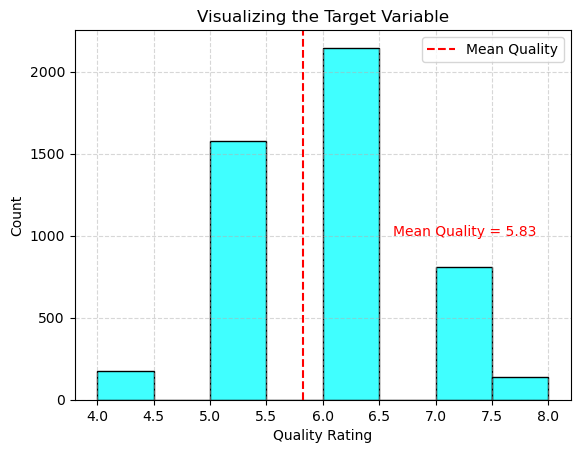

In [5]:
e.target_dist(df)

# Exploration

### Exploration Question 1:

Is the mean alcohol content in high quality wine (7 and up) significantly higher than the alcohol content of wine with lower quality ratings (5 and below) ?

H0: There is not a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (5 and below)

Ha: There is a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (6 and below)

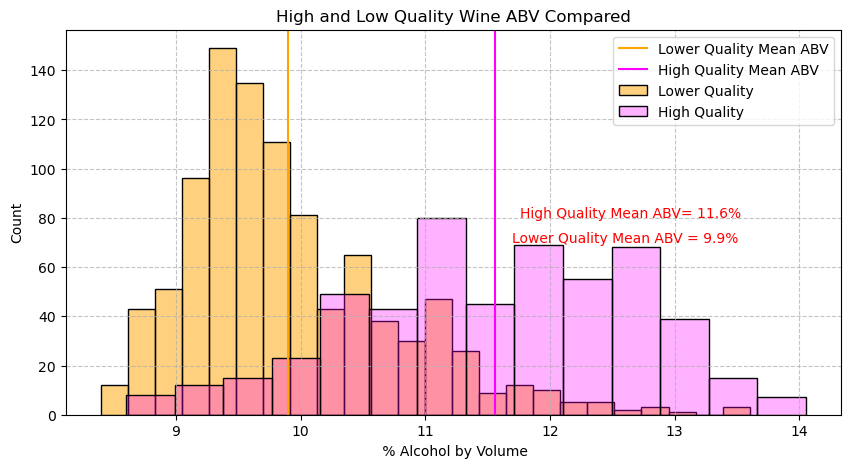

In [6]:
e.abv_plots(train)

### Independent t-test

In [7]:
e.abv_tstat(train)

t-statistic: 32.53
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha (0.05)
* We can reject the null hypthesis, and state with confidence that there is a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (6 and below)

### Exploration Question 2:
Does high quality wine (7+) have lower chloride levels than lower quality wine(5 and below)?

H0: There is no difference in the average chloride levels in wines of high quality and wines of lower quality

Ha: The average chloride levels in wines of high quality are significantly lower than wines of lower quality

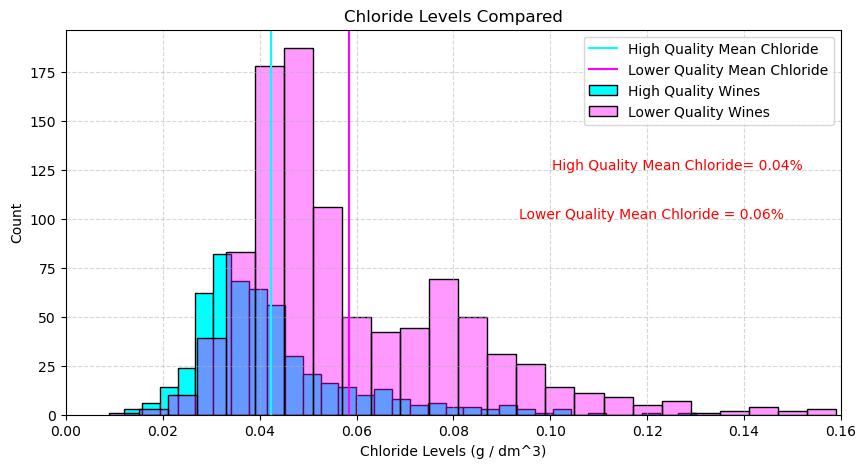

In [8]:
e.chlor_plots(train)

### Independent t-test

In [9]:
e.chlor_stat(train)

t-statistic: -14.26
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha (0.05)
* We can reject the null hypothesis, and state with confidence that the average chloride levels in wines of high quality are significantly lower than wines of lower quality

### Exploration Question 3:

Does high quality wine (7+) have lower residual sugar levels than lower quality wine(5 and below)?
 
H0: There is no difference in the average residual sugar levels in wines of high quality and wines of lower quality

Ha: The average residual sugar levels in wines of higher quality wines are significantly lower than wines of lower quality

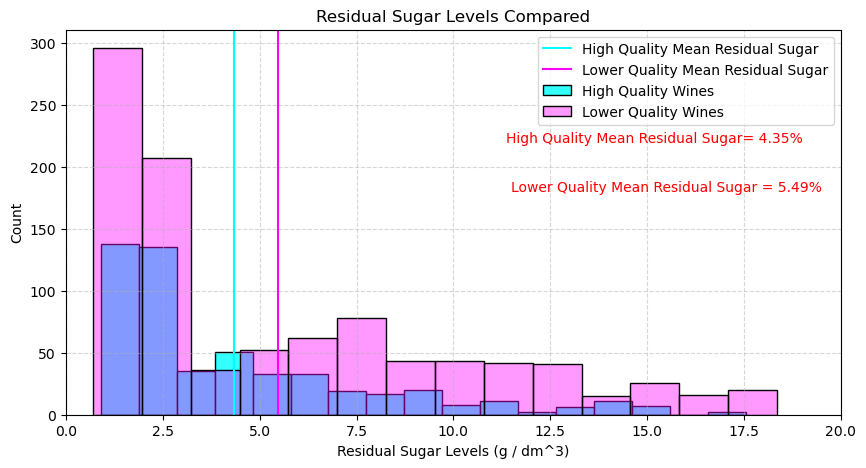

In [10]:
e.sugar_plots(train)

In [11]:
e.sugar_stat(train)

t-statistic: 4.94
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha (0.05)
* We can reject the null hypothesis, and state with confidence that the average residual sugar levels in wines of higher quality wines are significantly lower than wines of lower quality

### Exploration Question 4:

Does high quality wine (7+) have lower Volatile Acidity levels than lower quality wine(5 and below)?

H0: There is no difference in the average Volatile Acidity levels in wines of high quality and wines of lower quality

Ha: The average Volatile Acidity levels in wines of higher quality wines are significantly lower than wines of lower quality

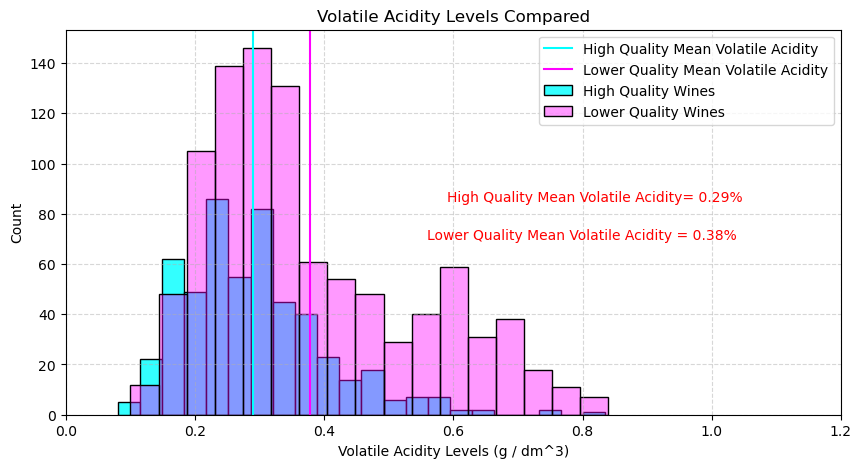

In [12]:
e.vol_acid_plots(train)

In [13]:
e.vol_stat(train)

t-statistic: 11.17
p-value: 0.0000


**Takeaways**
* The p value is lower than alpha
* We can reject the null hypothesis and state with confidence that the average Volatile Acidity levels in wines of higher quality wines are significantly lower than wines of lower quality

### Exploration Takeaways:

* Each feature we explored is statistically a driver of our traget variable, quality rating
* High quality wine has less volitile acidity, residual sugar, chlorides, & more alcohol. 

# Clustering and Modeling
* Additional preperation was required for modeling:
    * Numeric features scaled using min/max scaler
    * Data was further split into X and y train,validate, test.
    * Target variable removed for modeling and clustering

In [14]:
# call funtion to test each feature with clustering, 
# and return list in order of best score to worst core
m.find_best_features(df, 2, 10)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

## Clustering

* 'Fixed acidity' & 'volatile acidity' have the best silhouette score
* We will engineer a feature based on these clusters
* We will call a function to visualize the optimal number for k

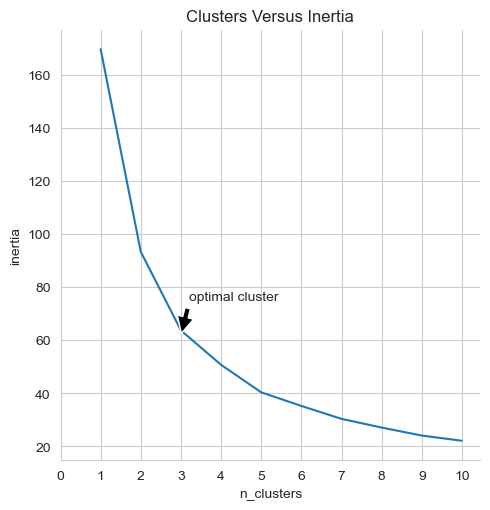

In [15]:
m.best_cluster(train, 'fixed acidity', 'volatile acidity')

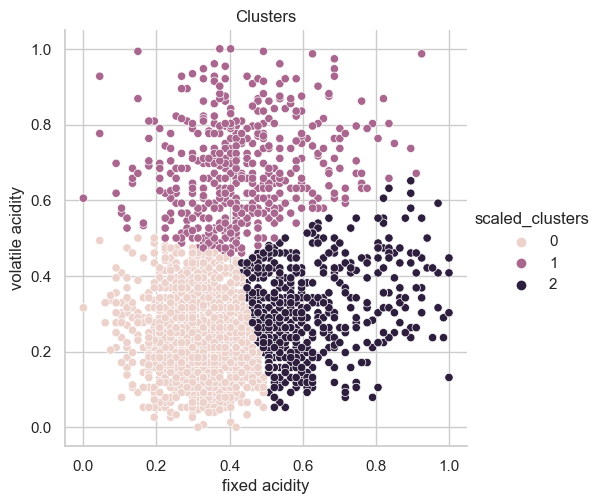

In [16]:
m.cluster_relplot(train, 'fixed acidity', 'volatile acidity')

### Modeling
* We will evaluate RMSE, our goal is to lower RMSE compared to basline
* We will test on 4 models; Linear Regression , Tweedie, Polynomial, lasso lars
* Data will be scaled using min/max scaler

In [17]:
# combining cluster and merging to original df
df_clusters = m.combined_df(df, 'fixed acidity', 'volatile acidity')
# split new df in train, validate, test
train, validate, test = p.train_val_test_split(df_clusters)
# scale data
train_scaled, validate_scaled, test_scaled = m.scale_data(
    train, validate, test, return_scaler=False)

In [18]:
# take a peek at our data
train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,scaled_clusters
4857,0.462687,0.394737,0.445946,0.480226,0.225166,0.219512,0.402214,0.469441,0.333333,0.246377,0.530973,6,white,0
5671,0.522388,0.421053,0.391892,0.062147,0.980132,0.000000,0.136531,0.655397,0.569892,0.971014,0.194690,6,red,0
3700,0.388060,0.289474,0.364865,0.045198,0.443709,0.280488,0.509225,0.404421,0.354839,0.391304,0.300885,5,white,1
6114,0.522388,0.644737,0.418919,0.073446,0.463576,0.109756,0.265683,0.620936,0.559140,0.637681,0.194690,6,red,2
1407,0.402985,0.144737,0.378378,0.163842,0.158940,0.182927,0.261993,0.375813,0.150538,0.768116,0.530973,6,white,1


In [19]:
# split our scaled data into X/y: train, validate, test
X_train, y_train, X_validate, y_validate, X_test, y_test = m.splitting_subsets(
    train, train_scaled, validate_scaled, test_scaled)

#### Calculating baseline RMSE

In [20]:
print(f' The Baseline RMSE is: {m.get_baseline(y_train)}')

 The Baseline RMSE is: 0.8508193687671466


In [21]:
# This function uses the train and validate datasets and 
# returns the results of 4 linear regression models as well as baseline.
m.best_models(X_train, y_train, X_validate, y_validate)

,model,train_rmse,validate_rmse,difference
0,linear_poly,0.661659,0.679402,-0.017743
1,lasso_lars,0.850819,0.858614,-0.007794
2,tweedie,0.787761,0.789717,-0.001956
3,baseline,0.850819,0.850819,0.000000
4,linear,0.703527,0.703367,0.000160


### Modeling Takaways
* PolynomialFeatures was the best performing model, reducing RMSE from the baseline of 0.85, to 0.68 on the validate set. 
* This resulted in a 20% reduction in root mean squared error on our validate set.

## Test

In [22]:
m.test_model(X_train, y_train, X_test, y_test)

 The RMSE score on test data is: 0.6677252234648402


### Conclusion

* Test data had RMSE score similar to train and validate!
* This resulted in a 20% reduction in root mean squared error on our test set.

### Recommendations:
* Data like type of grape could be very usefull here

### Next Steps

* With more time, we would like to explore additional features further, explore how else we can you clustering to refine our model.